In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

<div class="alert alert-info" role="alert">
    <h1>DATA IMPORT</h1>
</div>

In [2]:
from sklearn import datasets

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

dimensione features vector (150, 4)
dimensione labels vector (150,)


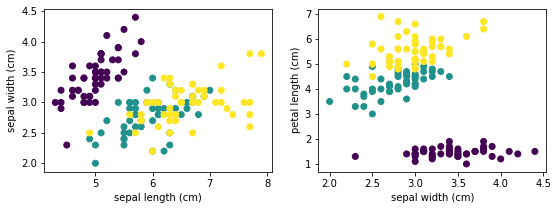

In [3]:
# load iris dataset 3 classes, 4 features,50 samples

iris = datasets.load_iris()
#print(iris)

print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
#print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i],data[:,i+1],c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])

plt.show()

<div class="alert alert-info" role="alert">
    <h1>DATA PREPROCESSING</h1>
</div>

In [4]:
# split dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.4 ,random_state=4)

In [5]:
# shape of train and test objects

print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [6]:
# shape of new y objects

print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


<div class="alert alert-info" role="alert">
    <h1>ML MODEL</h1>
</div>

The advantages of support vector machines are:
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. 


Hyperparameters to be considered
- C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error  is bearable. A smaller value of C creates a small-margin hyperplane and a  larger value of C creates a larger-margin hyperplane.
- Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset,  which causes over-fitting. 

### Svm - 1st use

Train features vector dimension (90, 2) 
train labels vector dimension (90,)


C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


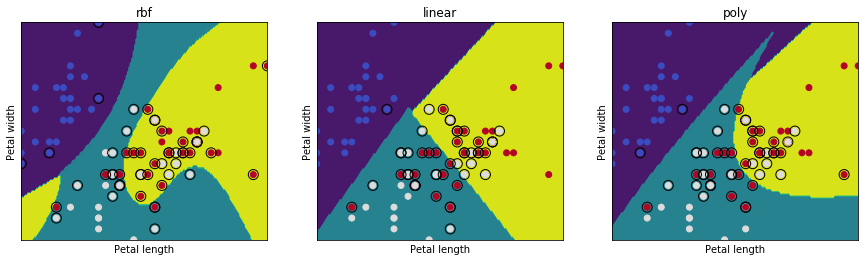

In [7]:
from sklearn import svm

X_train = X_train[:,0:2]
labels_train = y_train
print('Train features vector dimension',X_train.shape,
      '\ntrain labels vector dimension',labels_train.shape)

C_in = 100
kernel_l = ('rbf','linear', 'poly')

fig, axs = plt.subplots(1,len(kernel_l),figsize=[15, 4])
for i, kernel in enumerate(kernel_l):
  if kernel == 'poly':
    svc = svm.SVC(kernel=kernel, degree=3, C=C_in)
  else:
    svc = svm.SVC(kernel=kernel, gamma=0.7, C=C_in)

  # train the algorithm 
  svc = svc.fit(X_train, y_train)

  # prepare grid to be used in contourf
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
  #print('Mesh dimension',xx.shape,'x',yy.shape)

  Z = svc.predict(np.array([xx.ravel(), yy.ravel()]).T)
  Z = Z.reshape(xx.shape)

  # plot decision region
  axs[i].contourf(xx, yy, Z)
  
  # plot train
  axs[i].scatter(X_train[:, 0], X_train[:, 1], c=labels_train, cmap=plt.cm.coolwarm)

  # plot Support vector
  axs[i].scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],
                   s=100,
                   linewidth=1, 
                   facecolors='none', 
                   edgecolors='k',
                   )
  
  
  
  axs[i].set_xlabel('Petal length')
  axs[i].set_ylabel('Petal width')
  axs[i].set_xlim(X_train[:, 0].min(), X_train[:, 0].max())
  axs[i].set_ylim(X_train[:, 1].min(),X_train[:, 1].max())
  axs[i].set_xticks(())
  axs[i].set_yticks(())
  axs[i].set_title(kernel_l[i])
 
fig.show()

### Svm - 2nd use

This section add the accuracy metrics to find the best kernel

rbf Confusion Matrix 
 [[24  0  1]
 [ 0  9  8]
 [ 0  4 14]] 

linear Confusion Matrix 
 [[24  1  0]
 [ 0 15  2]
 [ 0  8 10]] 

poly Confusion Matrix 
 [[24  1  0]
 [ 0 11  6]
 [ 0  5 13]] 

[0.9466666666666667, 0.9733333333333334, 0.9466666666666667]

the max accuracy is 0.9733333333333334
the kernel with max accuracy is linear



C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


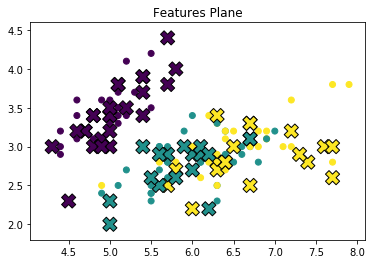

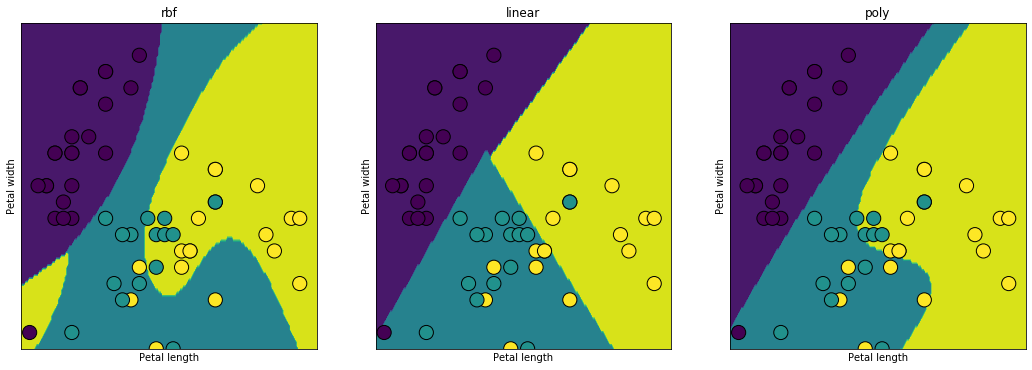

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

X_train=X_train[:,0:2]
labels_train=y_train
X_test=X_test[:,0:2]

figure,ax = plt.subplots(1,1)
ax.scatter(X_train[:,0],X_train[:,1],c=y_train)
ax.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='X',linewidth=1,
           edgecolors='k',s=200)
ax.set_title('Features Plane')

C_in=100
accuracy=[]
kernel_l=('rbf','linear', 'poly')
fig,axs = plt.subplots(1,len(kernel_l),figsize=[18, 6])

for i,kernel in enumerate(kernel_l):
  if kernel=='poly':
    svc = svm.SVC(kernel=kernel,gamma=0.7,degree=3,C=C_in)
  else:
    svc = svm.SVC(kernel=kernel,gamma=0.7,C=C_in)

  accuracy.append(cross_val_score(svc, data, labels, cv=10).mean())
  
  #train the algorthm 
  svc = svc.fit(X_train, y_train)
  print(kernel,'Confusion Matrix \n',confusion_matrix(y_test,svc.predict(X_test)),'\n')
                               
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
  #print('Mesh dimension',xx.shape,'x',yy.shape)

  Z = svc.predict(np.array([xx.ravel(), yy.ravel()]).T)
  Z = Z.reshape(xx.shape)

  #plot decision region
  axs[i].contourf(xx, yy,Z)
  
  #plot real test
  axs[i].scatter(X_test[:, 0], X_test[:, 1],c=y_test, 
                 marker='o',
                 linewidth=1,
                 edgecolors='k',
                 s=200
                )

  axs[i].set_xlabel('Petal length')
  axs[i].set_ylabel('Petal width')
  axs[i].set_xlim(X_train[:, 0].min(), X_train[:, 0].max())
  axs[i].set_ylim(X_train[:, 1].min(),X_train[:, 1].max())
  axs[i].set_xticks(())
  axs[i].set_yticks(())
  axs[i].set_title(kernel_l[i])
 
fig.show()

print (accuracy)
print(f'\nthe max accuracy is {max(accuracy)}')
print (f'the kernel with max accuracy is {kernel_l[accuracy.index(max(accuracy))]}\n')